<!-- #Dataset https://accentdb.org/#dataset -->

In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

%matplotlib inline
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (15, 7)

/var/folders/x_/hjbkrymn4f18f_k_bxs3y_qr0000gp/T/ipykernel_49433/1980825299.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


This is the first part of the project. The main goal is to investigate available methods for audio, particularly human speech features extraction.
At this moment, we use only one data sample from the chosen dataset. Additional exploration is needed for the whole dataset and is done in further steps.

## Data exploration

In [2]:
audio_data = "../resource/audio/english1.wav"
x, sr = librosa.load(audio_data)

In [3]:
print(x.shape, sr)

(482271,) 22050


In [4]:
ipd.Audio(filename=audio_data)

As we can see, the given audio sample is sampled at 22050 Hz, it has 1 channel and duration is 4 s.

Lets start by plotting our signal over time.

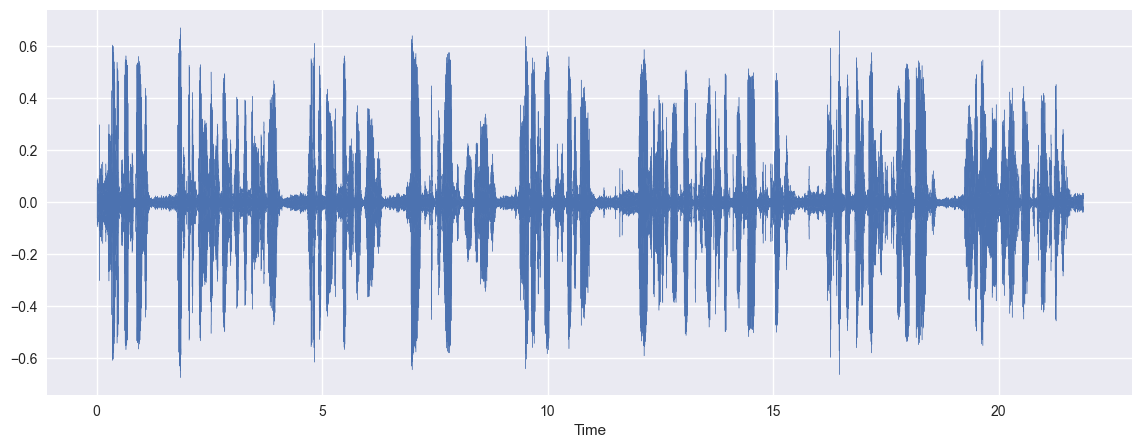

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)  
plt.show()

Now, let's plot a signal spectrogram to see the signal over time at various frequencies present in a particular waveform.

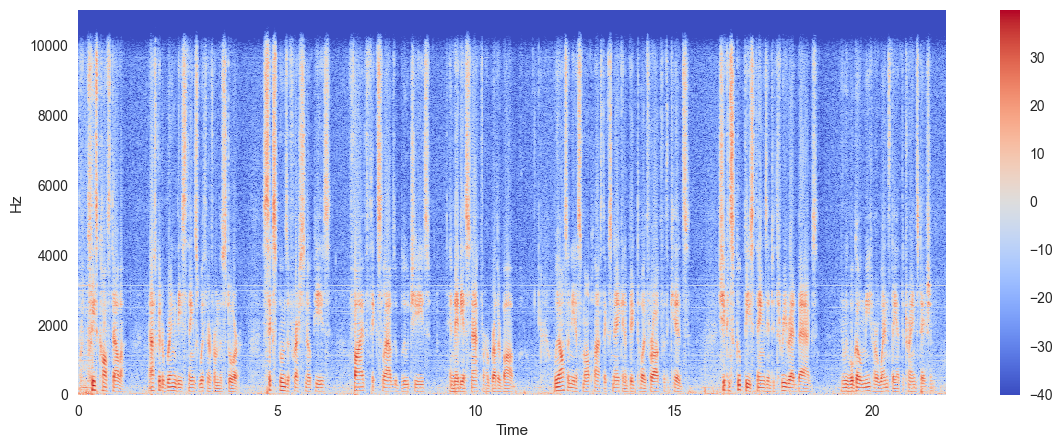

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

.stft() converts data into short term Fourier transform. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. 

The vertical axis shows frequencies (from 0 to 10000 Hz), and the horizontal axis shows the time of the clip. Since we heard the there is a silence in the begginig and at the end of the signal, spectrograms shows that there were no actions.

## Feature extraction from Audio signal

Audio signal consists of many features. Our particular example has dimensionality 88200. Therefore, we must extract the characteristics that are relevant for the given task. So, let's look at some feature extraction methods:

## Spectral centroid 

It indicates at which frequency the energy of a spectrum is centered upon or in other words it indicates where the ”center of mass” for a sound is located.

In [7]:
def normalize(X, axis=0):
    return minmax_scale(X, axis=axis)

In [8]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

(942,)

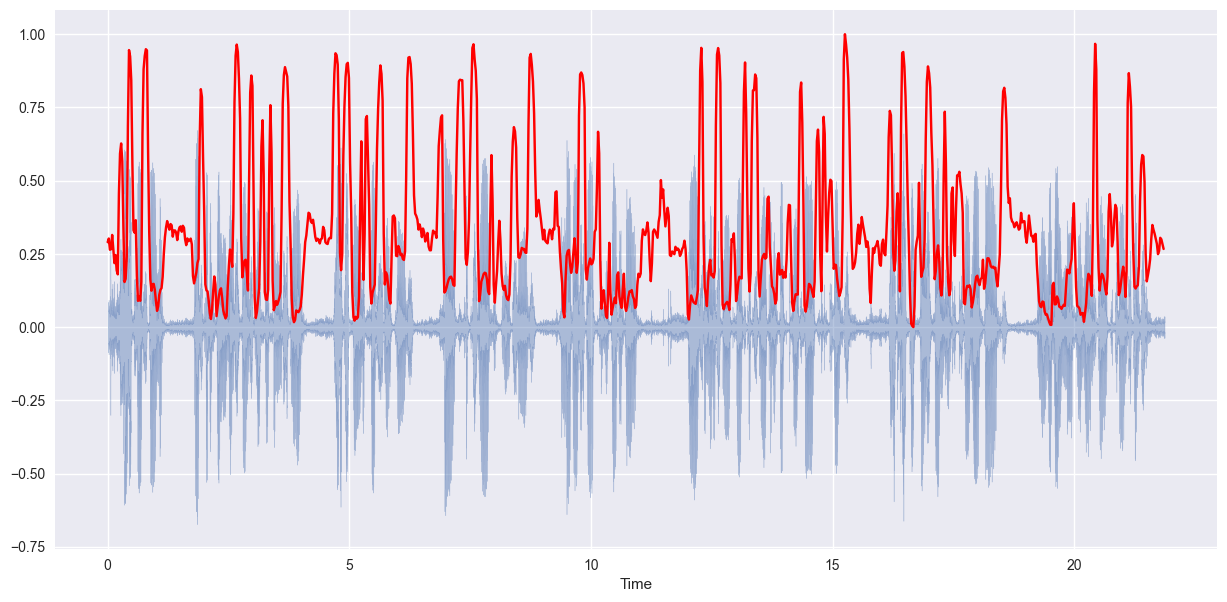

In [9]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color="r")
plt.show()

## Spectral Rolloff
It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0.

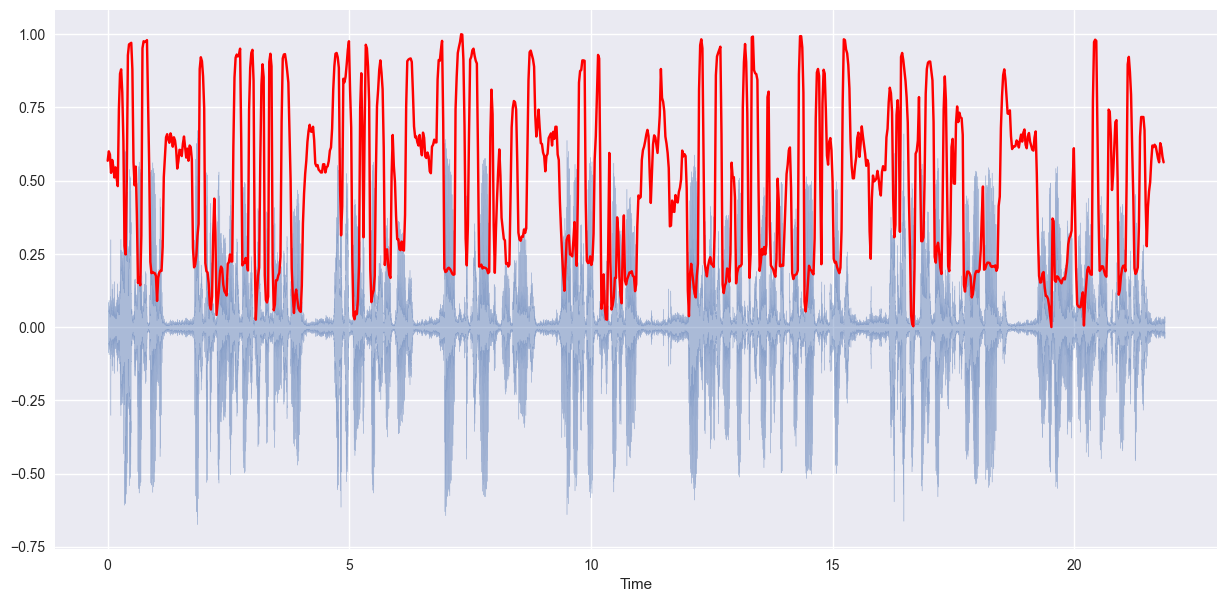

In [10]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x + 0.01, sr=sr)[0]
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames, sr=sr)

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color="r")
plt.show()


## Spectral Bandwidth

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

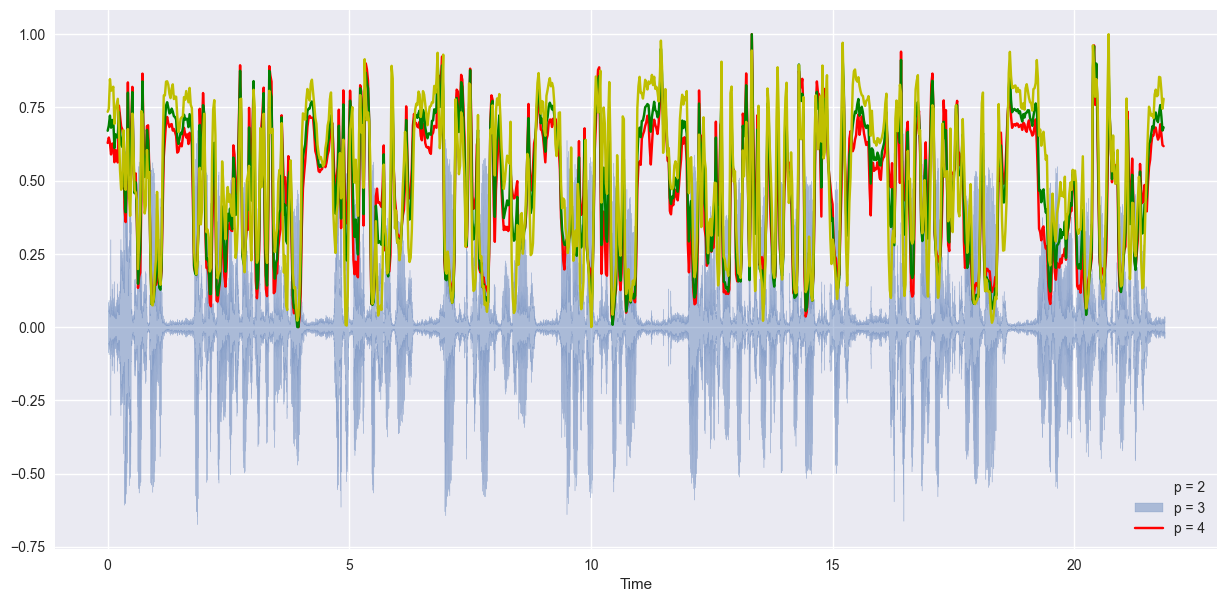

In [11]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x + 0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x + 0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x + 0.01, sr=sr, p=4)[0]

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color="r")
plt.plot(t, normalize(spectral_bandwidth_3), color="g")
plt.plot(t, normalize(spectral_bandwidth_4), color="y")
plt.legend(("p = 2", "p = 3", "p = 4"))
plt.show()

## Mel-Frequency Cepstral Coefficients(MFCCs)

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

(30, 942)


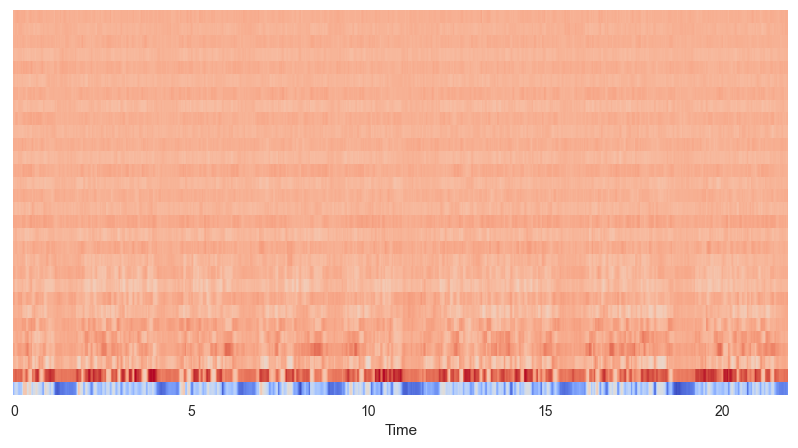

In [12]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=30)
print(mfccs.shape)

plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

In this case, mfcc computed 30 MFCCs over 173 frames.

Conclusion: as our dataset is collected human speech The Mel frequency cepstral coefficients suits it the best and we will use this types features for our further work.

References:
* https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html
* https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d